The purpose of this notebook is to show how to **read** some research data in python.

For example,

*   *Ni-foil-XAS-data-from-ISS-beamline.dat* is an X-ray absorption spectroscopy data from ISS beamline of NSLS-II
*   *Ni-foil-XAS-data-from-QAS-beamline.dat* is an X-ray absorption spectroscopy data from QAS beamline of NSLS-II
*   *Ni_calib_20190301-150927_459ff6_0001_mean_tth.chi* is X-ray diffraction data from XPD beamline of NSLS-II
*   *25KI-LiCl-KCl_25oC.xlsx* is excel file from a benchtop XRD equipment
*   topas.inp is an input file for TOPAS XRD refinement program and topas.out is an output file from TOPAS.
*   bde401ed-ac56-45cd-b0c5_000000.h5 is an hdf file from X-ray fluoresence detector at XPD beamline of NSLS-II
...

It should be noted that the purpose of this notebook is NOT to make pretty figures. Instead to show how to read
these files with Python....




# General imports

Let's import some libraries which will be usefull later.

In [3]:
import os
import sys
import shutil
import scipy

import numpy as np
import xarray as xr

ipympl is a nice tool for interactive plots.
See: https://matplotlib.org/ipympl/

In [4]:
try:
    %matplotlib inline
except:
    %matplotlib widget

# importing matplotlib for plots.
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
plt.rcParams['figure.constrained_layout.use'] = True

# Setting up the example data path

We assume this notebook and its data is on Google Drive so that we can use Google Colab. `os.chdir` sets your local path to the given directory (exactly like `cd` in terminal). You may need to adjust the path input if your directory structure is different.

In [5]:
try:
    from google.colab import drive
    drive.mount('/content/drive')
    os.chdir('/content/drive/MyDrive/SULI-2024/repositories/pySULI/notebooks/')
except:
    pass

If we are not in Google Colab, we continue as we would on a personal machine. Make sure that you open jupyter-lab (or whatever IDE you are using) in the `pySULI` directory, so that the here command gives the correct location. 

You can always use `os.getcwd()` to check where the current working directory is. `os.chdir('absolute or relative path')` will change the cwd to the entered path. `'..'` is the shortcut path for the next hightest branch. If you are in `'pySULI/notebooks'`, `os.chdir('..')` will bring you to `'pySULI'`. In Python, it is convenient to switch cwd often to avoid entering long absolute directories, but it is important to keep track of your cwd so you don't write files in the wrong places or try to read files that arent there.

You can read about how abs/relative directories are listed in different OS [here](https://phoenixnap.com/kb/absolute-path-vs-relative-path).

The notebooks will always assume `here` is `'../pySULI/notebooks/'`. `example_data_path` will change from notebook to notebook depending on what files are relevant to that notebook.

In [6]:
here = os.getcwd()
example_data_path = 'example_data/file_types/'

os.listdir('%s/%s'%(here,example_data_path))

['xls', 'plain_text', 'hdf', 'image', 'netcdf', 'yaml', 'npy']

# reading plain text files (txt, dat..)

In [7]:
# navigate into plain_text directory
os.chdir('%s/%s/%s'%(here,example_data_path,'plain_text'))

# list the contents of directory
os.listdir()

['topas.xy',
 'topas.inp',
 'topas.out',
 'topas_modified.inp',
 'Ni-foil-XAS-data-from-ISS-beamline.dat',
 'topas.dat',
 'Ni-foil-XAS-data-from-QAS-beamline.dat',
 'Ni_calib_20190301-150927_459ff6_0001_mean_tth.chi',
 'two-column-data.txt']

`two-column-data.txt` in the `plain_text` directory is a simple two-column text file.
The file can be imported into excel, and analyzed there.

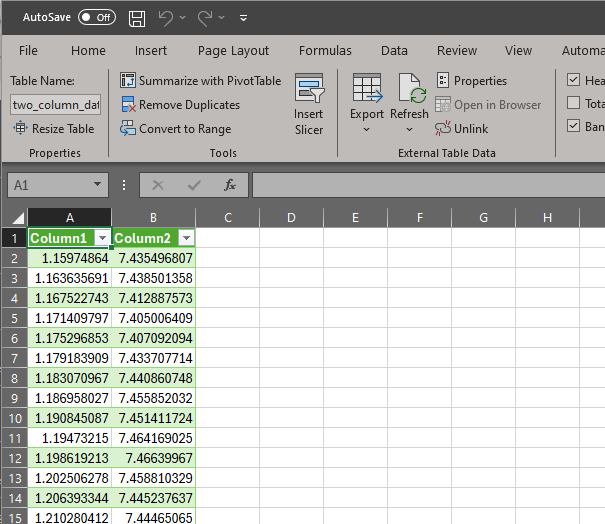

However, this is very inefficient. We want to read this file in Python.

In Python, we only need 3-lines of code to read and plot the contents of this file.

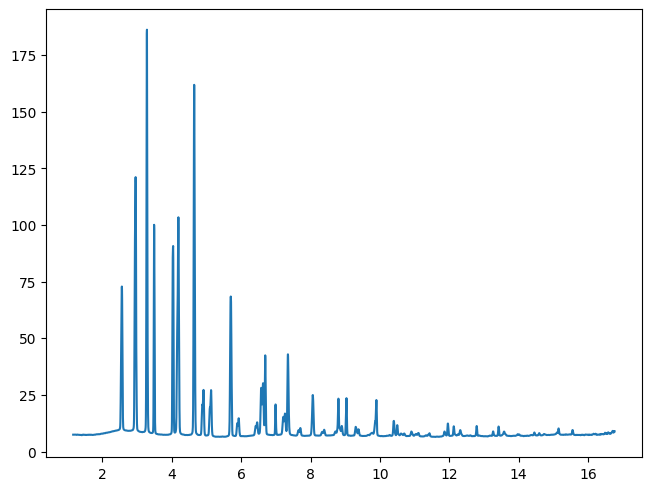

In [8]:
data = np.loadtxt('two-column-data.txt',unpack=True)
plt.figure()
plt.plot(data[0],data[1]);

But same lines **will not** work for the file `Ni_calib_20190301-150927_459ff6_0001_mean_tth.chi`. This file has some extra lines at the beginning, which are strings (text), and can not be converted to float (decimal number).


In [9]:
try:
    data = np.loadtxt('Ni_calib_20190301-150927_459ff6_0001_mean_tth.chi',unpack=True)
    plt.figure()
    plt.plot(data[0],data[1])
except Exception as exc:
    print(exc)


could not convert string '/nsls2/xf28id2/xpdUser/tiff_base/Ni_calib/integration/Ni_calib_20190301-150927_459ff6_0001_mean_tth to float64 at row 0, column 1.


You can use `head` linux bash command to see the first 10 lines of the file. When using bash commands, start with a `!`.

In [10]:
! head -n 10 Ni_calib_20190301-150927_459ff6_0001_mean_tth.chi

/nsls2/xf28id2/xpdUser/tiff_base/Ni_calib/integration/Ni_calib_20190301-150927_459ff6_0001_mean_tth
        This file contains integrated powder x-ray diffraction
        intensities.
        First column represents two theta values (degrees) and
        second column represents intensities and if there is
        a third column it represents the error values of intensities.
        Number of data points in the file : 3115
        ######################################################
7.483904475406880953e-03 6.011987304687499645e+00
1.406578056178594757e-02 7.987988471984863281e+00


We see that the first 7 lines do not contain data; lets skip them.

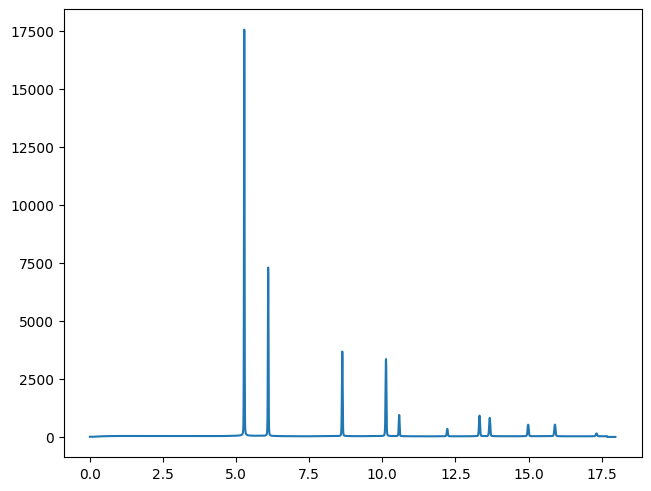

In [11]:
data = np.loadtxt('Ni_calib_20190301-150927_459ff6_0001_mean_tth.chi',unpack=True,skiprows=7)
plt.figure()
plt.plot(data[0],data[1]);

Now we want to read *Ni-foil-XAS-data-from-ISS-beamline.dat* file here

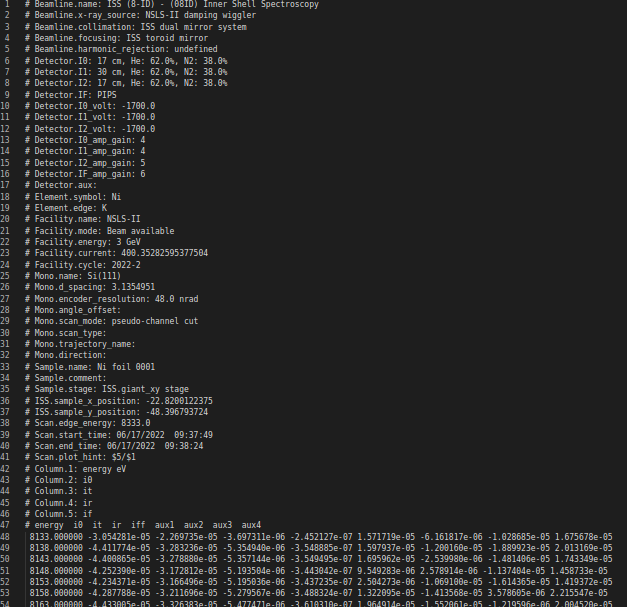

From the header lines, we can see first column is energy. We also see that the other columns are i0, it (transmission), ir (reference), and iff (fluoresence) channels. We can load the file and plot the data from the i0, it (transmission), ir (reference), iff (fluoresence) channels like this:


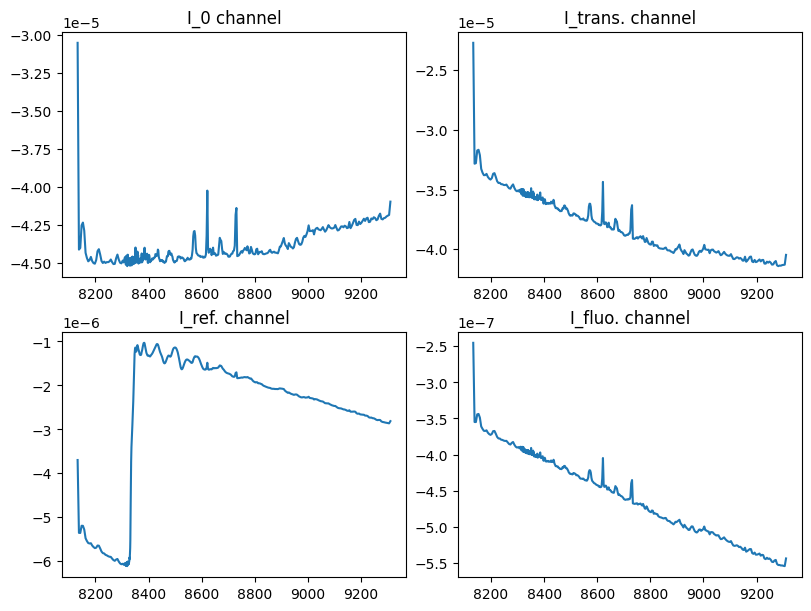

In [12]:
E, I0, It, Ir, If = np.loadtxt('Ni-foil-XAS-data-from-ISS-beamline.dat',unpack=True,usecols=[0,1,2,3,4])

fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(2,2,1)
ax.plot(E,I0)
ax.set_title('I_0 channel')

ax = fig.add_subplot(2,2,2)
ax.plot(E,It)
ax.set_title('I_trans. channel')

ax = fig.add_subplot(2,2,3)
ax.plot(E,Ir)
ax.set_title('I_ref. channel')

ax = fig.add_subplot(2,2,4)
ax.plot(E,If)
ax.set_title('I_fluo. channel');

For X-ray Absorption Spectroscopy (XAS) theory you can check Bruce Ravel's NSLS-II lecture slides [here](https://www.bnl.gov/nsls2/userguide/lectures/lecture-4-ravel.pdf).

From slide 16/63 we can see that transmission for XAS is defined as:  $\mu(E)$ = ln(I$_0$/I$_t$)

We can easily plot $\mu(E)$ for reference channel as below:

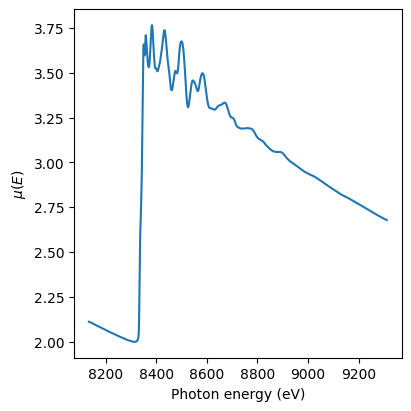

In [13]:
E, I0, It, Ir, If = np.loadtxt('Ni-foil-XAS-data-from-ISS-beamline.dat',unpack=True,usecols=[0,1,2,3,4])

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(1,1,1)
ax.plot(E,np.log(I0/Ir))
ax.set_ylabel('$\mu(E)$')
ax.set_xlabel('Photon energy (eV)');

Sometimes, we may be interested in including some of the information from the file header in its plot title.
For example, the scan of file Ni-foil-XAS-data-from-ISS-beamline.dat started @ 06/17/2022  09:37:49
and it ended @ 06/17/2022  09:38:24, and took 34 seconds in total. We can include this info
at the title of the plot as shown below.

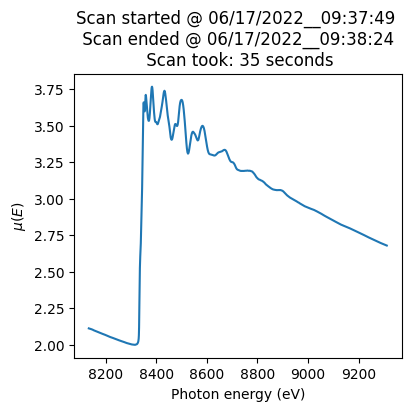

In [14]:
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(1,1,1)
ax.plot(E,np.log(I0/Ir))
ax.set_ylabel('$\mu(E)$')
ax.set_xlabel('Photon energy (eV)')
ax.set_title('Scan started @ 06/17/2022__09:37:49 \n Scan ended @ 06/17/2022__09:38:24 \n Scan took: 35 seconds');

It is fine to do this header reading manually, but if we are dealing with hundreds of files, that will be incredibly time-consuming. Instead, we can extract the date and time information from the file using Python functions. We can recreate the plot from above, but without "hard-coding" in the date and time.

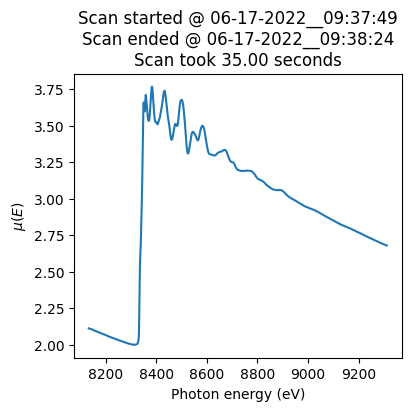

In [15]:
# This is a method which takes in a data file and outputs the start and end times in the file header (if it can find them).
# It works by searching line by line for date and time labels, and then uses formatting to match to the date and time on
# a given line where it finds a label. These dates/times are "stripped" using a method from the datetime library.
def get_title_str(datfile):
    import datetime
    with open(datfile) as datfile:
        lines = datfile.readlines()
        for e,line in enumerate(lines):
            if line.startswith('# Scan.start_time:'):
                dt_start = datetime.datetime.strptime("%s_%s"%(line.split()[2], line.split()[3]), "%m/%d/%Y_%H:%M:%S")
            elif line.startswith('# Scan.end_time:'):
                dt_stop = datetime.datetime.strptime("%s_%s"%(line.split()[2], line.split()[3]), "%m/%d/%Y_%H:%M:%S")
            elif line.startswith('# Start time:'):
                dt_start = datetime.datetime.strptime("%s_%s"%(line.split()[3], line.split()[4]), "%m/%d/%Y_%H:%M:%S")
            elif line.startswith('# Stop time:'):
                dt_stop = datetime.datetime.strptime("%s_%s"%(line.split()[3], line.split()[4]), "%m/%d/%Y_%H:%M:%S")

    title_str = '%s\n%s\nScan took %.2f seconds'%(
        dt_start.strftime("Scan started @ %m-%d-%Y__%H:%M:%S"),
        dt_stop.strftime("Scan ended @ %m-%d-%Y__%H:%M:%S"),
        (dt_stop.timestamp()-dt_start.timestamp()))

    return title_str


fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(1,1,1)
ax.plot(E,np.log(I0/Ir))
ax.set_ylabel('$\mu(E)$')
ax.set_xlabel('Photon energy (eV)')

ax.set_title(get_title_str('Ni-foil-XAS-data-from-ISS-beamline.dat'));

The `topas.inp` file in the plain_text folder is used as an input file for the TOPAS 
program (https://topas.webspace.durham.ac.uk/) which does the XRD refinement. Sometimes we may need to alter a parameter in many files such as this one, and as above, doing it manually is unfeasable. This example illustrates how to find a value in a text file and replace it with a new value, using Python methods. We use the difflib library to compare differences between two files.

In [17]:
# import regular expression library, this library allows for advanced string formatting
import re

with open('topas.inp', 'r') as file:
    contents = file.read()

    # regex expression to search for a number as xxx.xxxx
    pattern = r'Cubic\((\d+\.\d+)\)'

    # grab the number out, and reformat it to 0.001 precision
    newvalue = format(float(re.findall(pattern, contents)[0]), ".3f")

    # create replacement string using reformatted number, and replace
    replacement = 'Cubic(' + str(newvalue) + ')'
    modified_contents = re.sub(pattern, replacement, contents)

    with open('topas_modified.inp', 'w') as newfile:
        newfile.write(modified_contents)


# import library for sequence comparisons
import difflib

with open('topas.inp') as ogfile: 
    og_text = ogfile.readlines() 
  
with open('topas_modified.inp') as newfile: 
    new_text = newfile.readlines() 
  
# output the difference between topas.inp and topas_modified.inp
for line in difflib.unified_diff( 
        og_text, new_text, fromfile='topas.inp',  
        tofile='topas_modified.inp', lineterm=''): 
    print(line) 

--- topas.inp
+++ topas_modified.inp
@@ -30,7 +30,7 @@
 		}

 

 		scale @  0.0253272279`_3.944e-005

-		Cubic(4.156826)

+		Cubic(4.157)

 		

 Out_X_Yobs_Ycalc_and_Difference("topas.dat")

 C_matrix_normalized



The `-` line tells us the string which was replaced by the `+` line.

The following cells show how to read in, and plot or explore various file types in python.

# reading xls files into python

To read an excel file, we use the pandas library. It is an incredibly useful library for manipulating tabular data; think excel functionality, in Python.

In [25]:
# navigate into xls directory
os.chdir('%s/%s/%s'%(here,example_data_path,'xls'))

# list the contents of directory
os.listdir()

#import pandas library
import pandas as pd

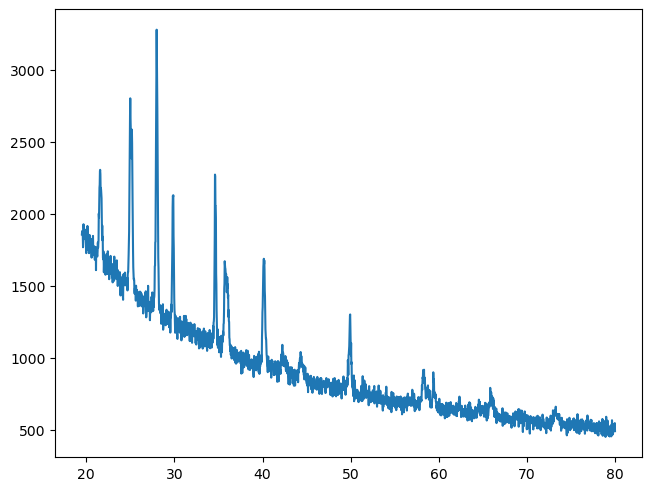

In [41]:
xls = pd.ExcelFile(r'25KI-LiCl-KCl_25oC.xlsx') #read file
sheetX = xls.parse(0) #read sheet 1
plt.plot(sheetX['Angles'],sheetX['Intensities']);

# reading image files into python

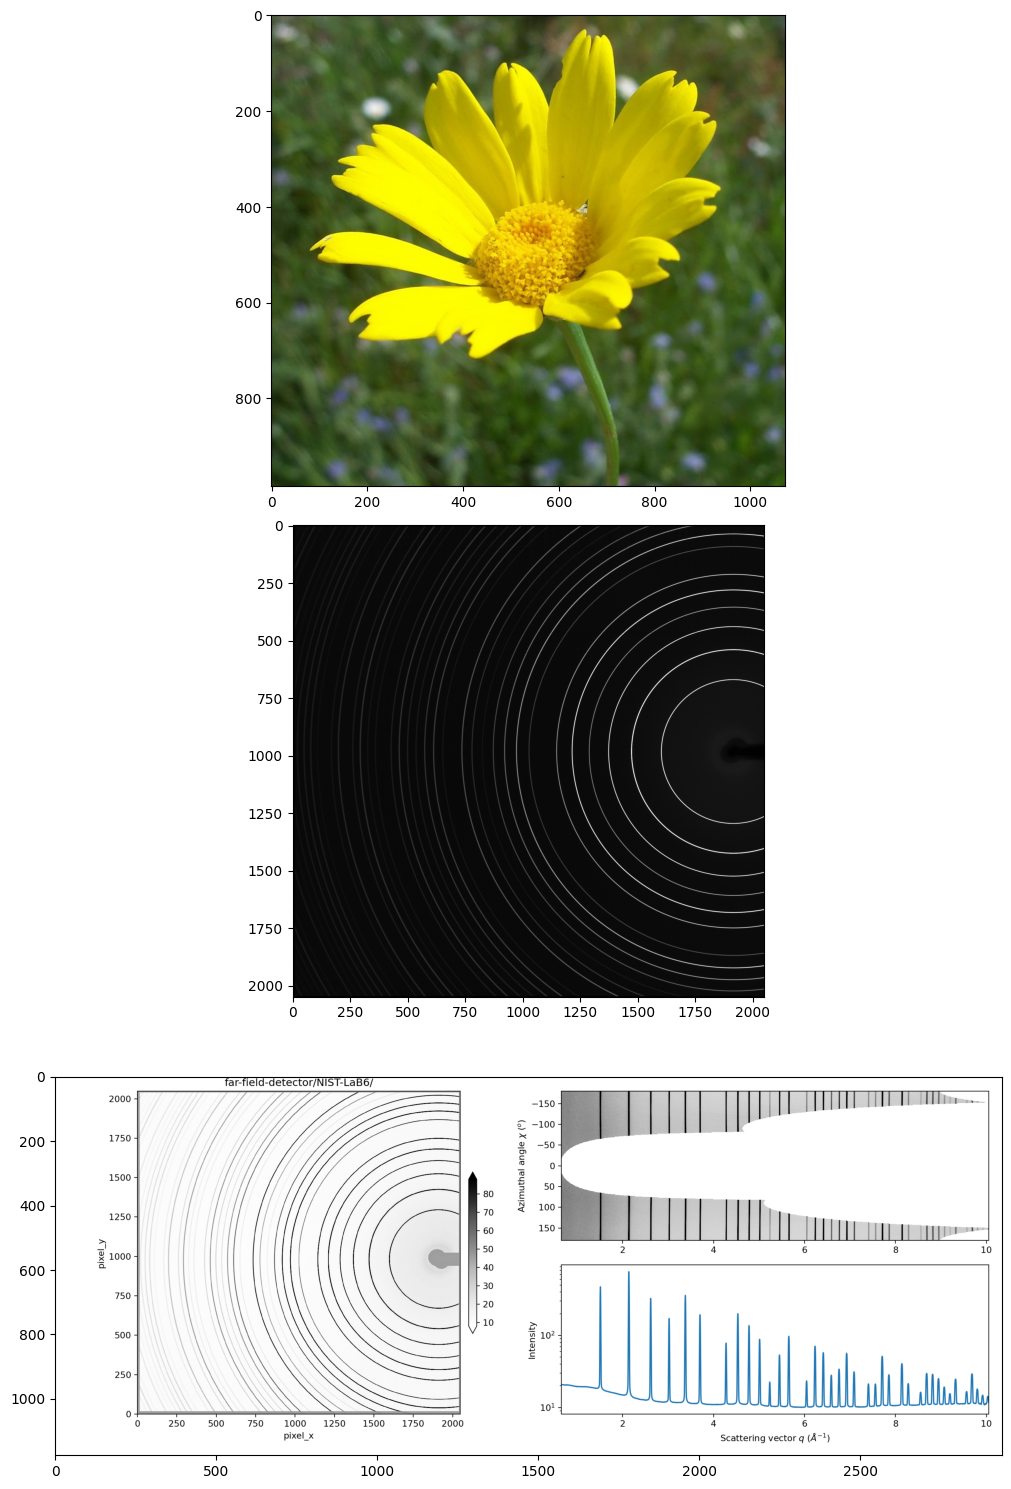

In [18]:
# navigate into image directory
os.chdir('%s/%s/%s'%(here,example_data_path,'image'))

from PIL import Image

# set up plot for images
fig, (ax1, ax2, ax3) = plt.subplots(3,figsize=(10,15))

# open and display image 1 
im1 = Image.open('flower.jpg')
ax1.imshow(im1)

# open and display image 2
im2 = Image.open('NIST-LaB6.tiff')
ax2.imshow(im2)

# open and display image 3
im3 = Image.open('NIST-LaB6.png')
ax3.imshow(im3);

# reading xarray netCDF files into python

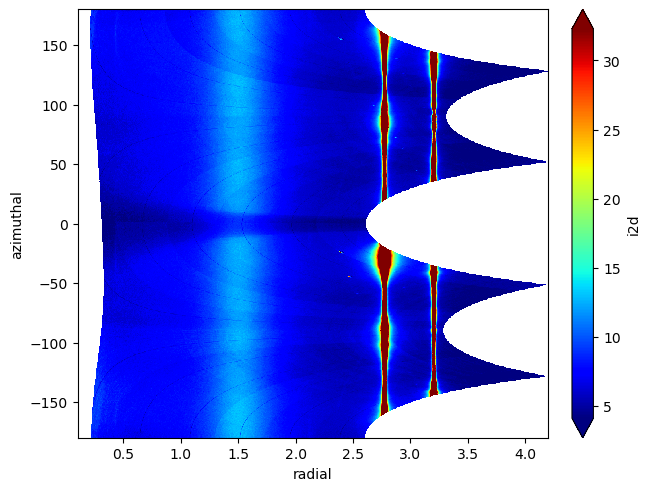

In [45]:
# navigate into plain_text directory
os.chdir('%s/%s/%s'%(here,example_data_path,'netcdf'))

# list the contents of directory
os.listdir()

with xr.open_dataset('Pt-from-28ID-2-D.nc') as ds:
    ds.load()
ds

plt.figure()
ds.i2d.plot(robust=True,cmap='jet');

In [47]:
with xr.open_dataset('Pt-from-28ID-2-D.nc') as ds:
    ds.load();
ds

<xarray.Dataset>
Dimensions:     (radial: 1641, q: 760, azimuthal: 720)
Coordinates:
  * radial      (radial) float64 0.1013 0.1038 0.1063 ... 4.196 4.199 4.201
  * q           (q) float64 2.101 2.104 2.106 2.109 ... 3.991 3.994 3.996 3.999
  * azimuthal   (azimuthal) float64 -179.8 -179.3 -178.8 ... 178.8 179.3 179.8
Data variables:
    Yobs        (q) float64 1.001 1.001 1.001 1.002 ... 1.001 1.003 1.003 1.003
    Ycalc       (q) float64 2.278 2.082 1.902 1.736 ... 4.506 4.777 5.066 5.375
    Ybkg        (q) float64 0.2554 0.2553 0.2551 0.2544 ... 0.1779 0.1789 0.1783
    Ybkg_arpls  (q) float64 0.01164 0.0118 0.01195 ... 0.03517 0.03521 0.03524
    Ybkg_blank  (q) float64 0.2438 0.2435 0.2431 0.2423 ... 0.1427 0.1437 0.1431
    Ybkg_topas  (q) float64 2.187 1.99 1.807 1.639 ... -6.464 -6.34 -6.203
    Yp1         (q) float64 2.187 1.99 1.807 1.639 ... -6.464 -6.34 -6.203
    Yp2         (q) float64 2.278 2.082 1.901 1.735 ... 4.464 4.734 5.023 5.331
    i2d         (azimuthal, radial) float32 nan nan nan nan ... nan nan nan nan
Attributes: (12/69)
    user_note:             Platinum RT stationary
    type:                  basic
    uid_dark:              f54aaa88-ef58-4858-90e8-1f6ec182d317
    take_dark:             false
    beam:                  on
    lights:                on
    ...                    ...
    arpls_lam:             10000.0
    arpls_ratio:           0.005
    topas_inp:             \ndo_errors\nxdd topas.xy\n   r_exp 52.9798125 r_e...
    topas_out:             do_errors\nxdd 6XHOSJ7.data.xy\n   r_exp  68.55923...
    y_scale:               0.04093122505610739
    y_baseline:            1

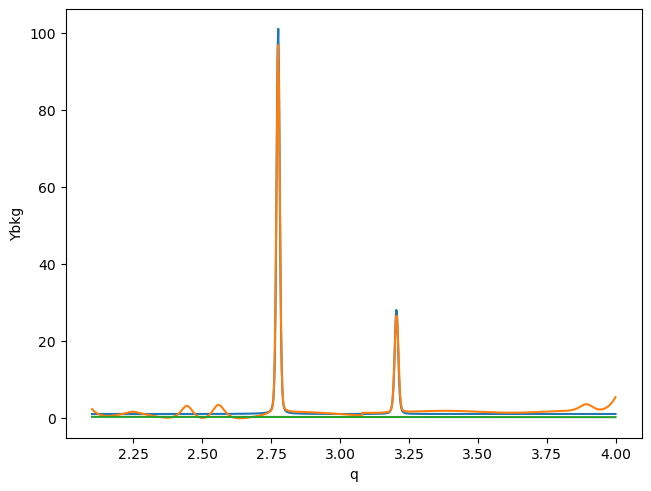

In [49]:
plt.figure()
ds.Yobs.plot()
ds.Ycalc.plot()
ds.Ybkg.plot();

# reading hdf files into python

In [51]:
#navigate to hdf dir
os.chdir('%s/%s/%s'%(here,example_data_path,'hdf'))
os.listdir()
#import hdf library
import h5py 

In [59]:
#opens file in read mode, shows size of embeded dataset and prints contents
f = h5py.File('bde401ed-ac56-45cd-b0c5_000000.h5','r')
print(f.keys())
ds = f['entry']['data']['data']
print(ds)
ds_arr = ds[()]
ds_arr

<KeysViewHDF5 ['entry']>
<HDF5 dataset "data": shape (160, 1, 4096), type "<f8">


array([[[76.20071284, 57.40054146, 41.60040076, ...,  0.        ,
          0.        ,  0.        ]],

       [[80.60078414, 57.80054428, 41.20037208, ...,  0.        ,
          0.        ,  0.        ]],

       [[69.00064268, 59.80060578, 42.80040283, ...,  0.        ,
          0.        ,  0.        ]],

       ...,

       [[69.20059656, 57.40053506, 46.80044281, ...,  0.        ,
          0.        ,  0.        ]],

       [[69.40066421, 58.20056581, 39.80039361, ...,  0.        ,
          0.        ,  0.        ]],

       [[72.20064396, 57.60050586, 42.40037401, ...,  0.        ,
          0.        ,  0.        ]]])

# reading numpy files (npy, npz) into python

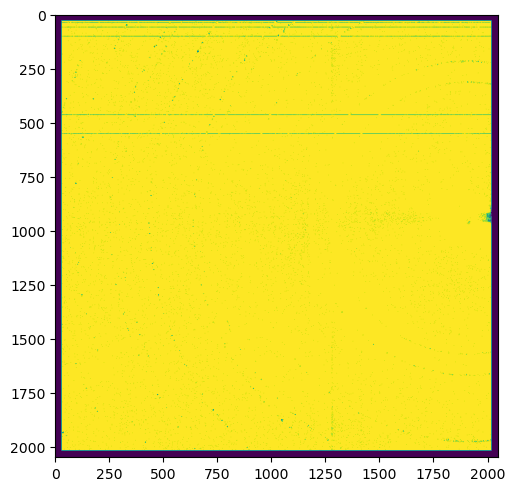

In [61]:
# navigate into npy directory
os.chdir('%s/%s/%s'%(here,example_data_path,'npy'))

file1 = np.load("Ni_calib_20190301-150927_459ff6_0001_mask.npy")
file2 = np.load("feff.npz")

plt.figure()
plt.imshow(file1);

# reading yaml into python

In [63]:
import yaml

# navigate into yaml directory
os.chdir('%s/%s/%s'%(here,example_data_path,'yaml'))

def find_key(data, key):
    if isinstance(data, dict):
        if key in data:
            return data[key]
        else:
            for k, v in data.items():
                result = find_key(v, key)
                if result is not None:
                    return result
    elif isinstance(data, list):
        for item in data:
            result = find_key(item, key)
            if result is not None:
                return result

with open("from_xpdacq.yaml") as stream:
    data_loaded = yaml.safe_load(stream)
    result = find_key(data_loaded,"bt_wavelength")
    print("bt_wavelength =", result)
    

bt_wavelength = 0.1814
